In [1]:
!unzip train_1.csv.zip

Archive:  train_1.csv.zip
  inflating: train_1.csv             


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [0]:
data = pd.read_csv('train_1.csv')

In [4]:
# Data is from July 2015 to December 2016.
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [5]:
data.shape   # There are 145K different time series given to us.

(145063, 551)

In [0]:
data = data.fillna(0)   # Filling all NaN with 0s. Because as all the pages are individual, NaN refers to 0 views of the pages. 

In [0]:
# Checking the influence of different languages conserning traffic. 
# Extracting the language from the Page colummn.
# Creating a new column showing the specific language

def getLang(page):
  lang = re.search('[a-z][a-z].wikipedia.org', page)
  if lang:
    return lang[0][0:2]
  return 'na'

data['lang'] = data.Page.map(getLang)

In [8]:
# Counting the number of pages based on languages.
# Large number of pages are in English language.

data.lang.value_counts()

en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: lang, dtype: int64

In [0]:
#  extracting all the rows based on the language and creating a set.

lang_ = {}

lang_['en'] = data[data.lang == 'en'].iloc[:,0:-1]
lang_['ja'] = data[data.lang == 'ja'].iloc[:,0:-1]
lang_['de'] = data[data.lang == 'de'].iloc[:,0:-1]
lang_['na'] = data[data.lang == 'na'].iloc[:,0:-1]
lang_['fr'] = data[data.lang == 'fr'].iloc[:,0:-1]
lang_['zh'] = data[data.lang == 'zh'].iloc[:,0:-1]
lang_['ru'] = data[data.lang == 'ru'].iloc[:,0:-1]
lang_['es'] = data[data.lang == 'es'].iloc[:,0:-1]

In [26]:
lang_

{'de':                                                      Page  ...  2016-12-31
 46371   10_Cloverfield_Lane_de.wikipedia.org_all-acces...  ...         3.0
 46372     11._November_de.wikipedia.org_all-access_spider  ...        13.0
 46373       12_Monkeys_de.wikipedia.org_all-access_spider  ...         8.0
 46374   187_Strassenbande_de.wikipedia.org_all-access_...  ...        18.0
 46375      1944_(Lied)_de.wikipedia.org_all-access_spider  ...         4.0
 ...                                                   ...  ...         ...
 141521  Anschlag_auf_den_Berliner_Weihnachtsmarkt_an_d...  ...      1728.0
 141522  Hacksaw_Ridge_–_Die_Entscheidung_de.wikipedia....  ...       397.0
 141523  Flugunfall_der_KLM_Fokker_F.XXII_„Kwikstaart“_...  ...        10.0
 141524  Winnetou_–_Der_Mythos_lebt_de.wikipedia.org_al...  ...      4190.0
 141525  Fifty_Shades_of_Grey_–_Gefährliche_Liebe_de.wi...  ...         0.0
 
 [18547 rows x 551 columns],
 'en':                                             

In [0]:
# countinge aprrox. number of pages in each lang.
sums = {}
for key in lang_:
    sums[key] = lang_[key].iloc[:,1:].sum(axis=0) / lang_[key].shape[0]

In [28]:
sums['en']

2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Length: 550, dtype: float64

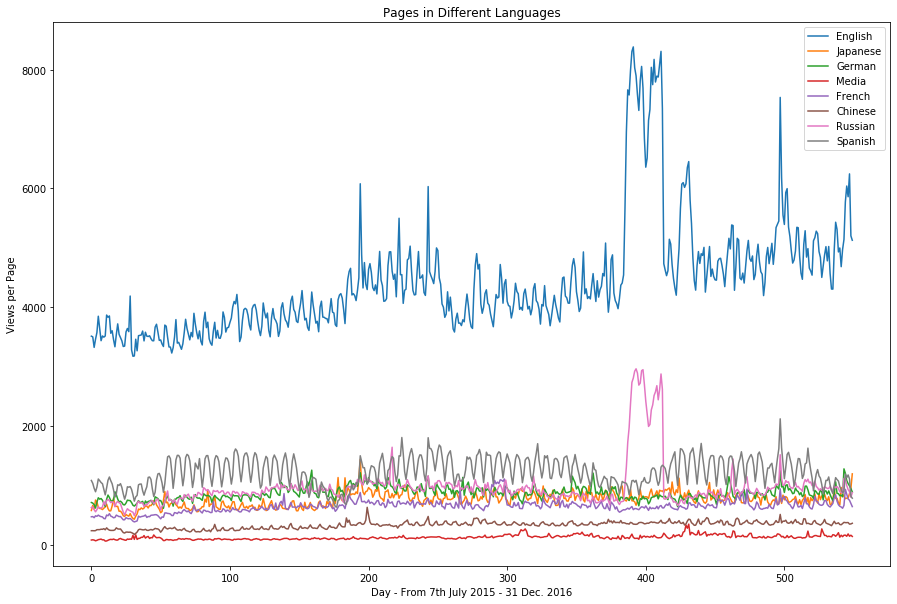

In [29]:
# Visualizing how the views of the pages changes over time.
# English pages has more traffic per page than any other language.

days = [i for i in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[15,10])
plt.ylabel('Views per Page')
plt.xlabel('Day - From 7th July 2015 - 31 Dec. 2016')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

# English and Russian lang. is showing some big spikes on day 400. It might be the due to some particular event in the news.

In [0]:
def plot_entry(key,idx):
    data_ = lang_[key].iloc[idx,1:]
    fig = plt.figure(1,figsize=(10,5))
    plt.plot(days,data_)
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(data.iloc[lang_[key].index[idx],0])
    
    plt.show()

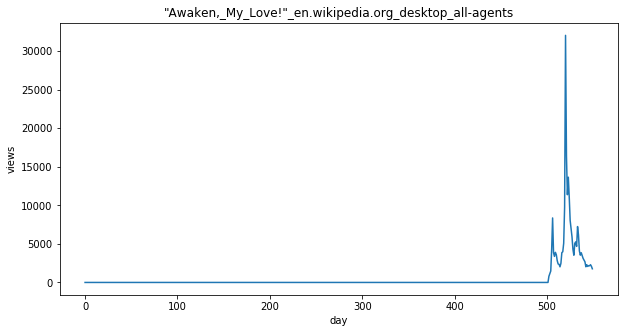

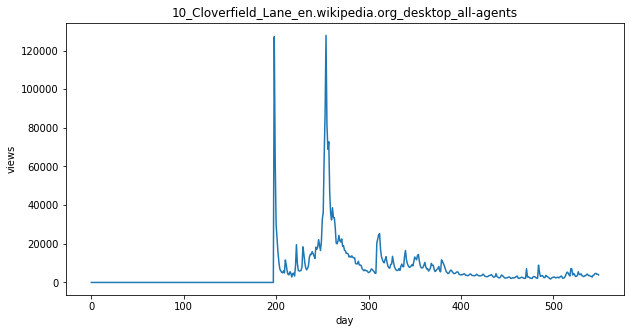

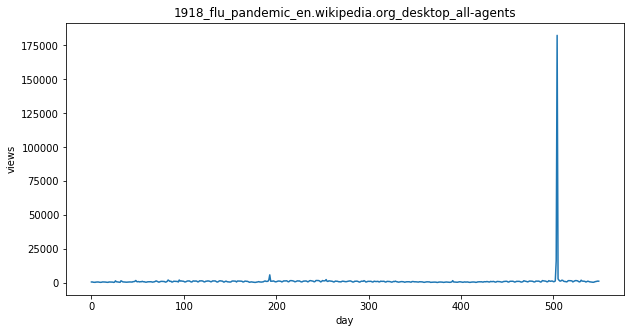

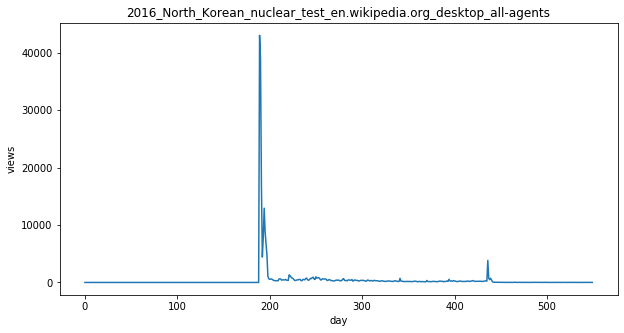

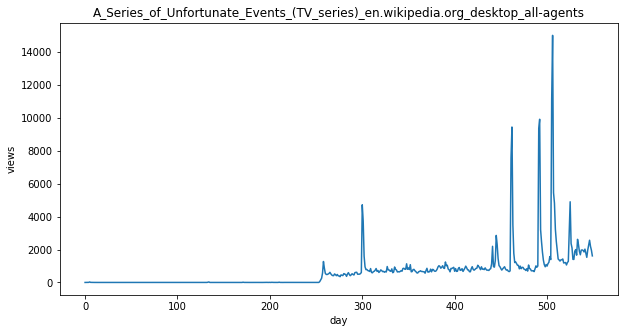

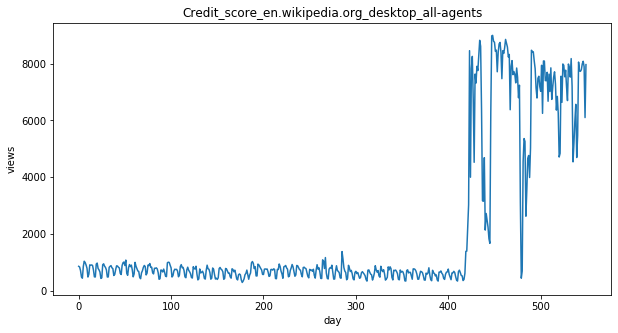

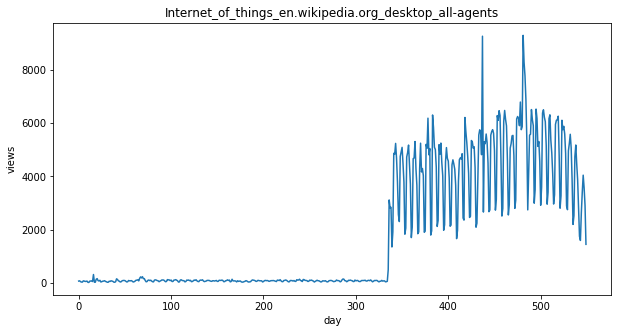

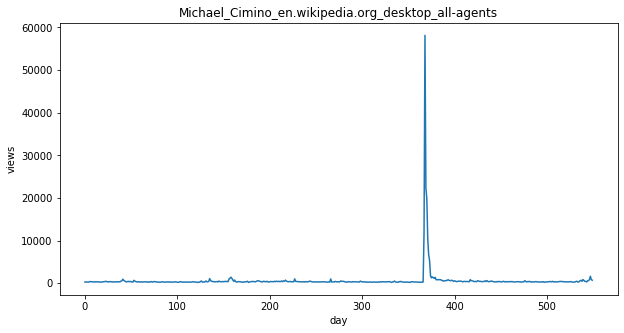

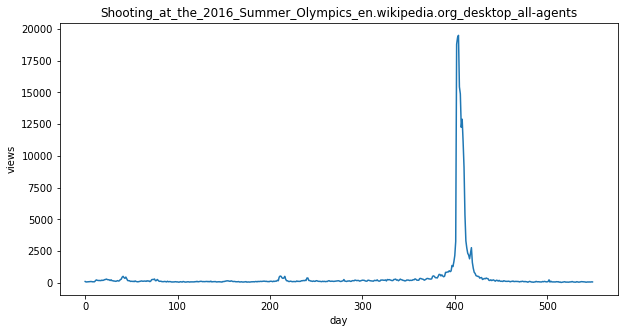

In [32]:
idx = [1, 5, 10, 50, 100, 500, 1000, 1500, 2000]
for i in idx:
    plot_entry('en',i)

# Checking time series of english language.
# Time series is not stationary.
# Each page traffic highly depends on the time is more popular in news.
# Like Olympic, nuclear test, IOT etc. has individual page traffic based on the respective season.

In [36]:
# Checking top 5 pages of each language.

top_pages = {}
for key in lang_:
    print('\n', key)
    sum_set = pd.DataFrame(lang_[key][['Page']])
    sum_set['total'] = lang_[key].sum(axis=1)
    sum_set = sum_set.sort_values('total',ascending=False)
    print(sum_set.head(5))
    top_pages[key] = sum_set.index[0]


 en
                                                    Page         total
38573   Main_Page_en.wikipedia.org_all-access_all-agents  1.206618e+10
9774       Main_Page_en.wikipedia.org_desktop_all-agents  8.774497e+09
74114   Main_Page_en.wikipedia.org_mobile-web_all-agents  3.153985e+09
39180  Special:Search_en.wikipedia.org_all-access_all...  1.304079e+09
10403  Special:Search_en.wikipedia.org_desktop_all-ag...  1.011848e+09

 ja
                                                 Page        total
120336  メインページ_ja.wikipedia.org_all-access_all-agents  210753795.0
86431      メインページ_ja.wikipedia.org_desktop_all-agents  134147415.0
123025   特別:検索_ja.wikipedia.org_all-access_all-agents   70316929.0
89202       特別:検索_ja.wikipedia.org_desktop_all-agents   69215206.0
57309   メインページ_ja.wikipedia.org_mobile-web_all-agents   66459122.0

 de
                                                     Page         total
139119  Wikipedia:Hauptseite_de.wikipedia.org_all-acce...  1.603934e+09
116196  Wikip

In [0]:
from statsmodels.tsa.arima_model import ARIMA
import warnings

[ 1.05069144e+04  1.35153662e-01 -9.72115863e-01 -1.02586538e-01
  9.74779358e-01]


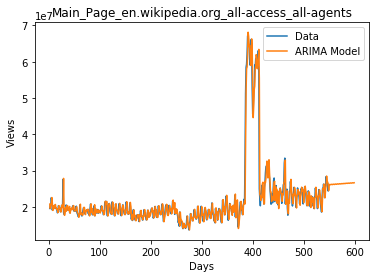

[ 2.13276529e+02 -1.35308123e-03  1.80373805e-01 -2.78851686e-01
 -5.34694649e-01]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12506 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12472 missing from current font.
  font.set_

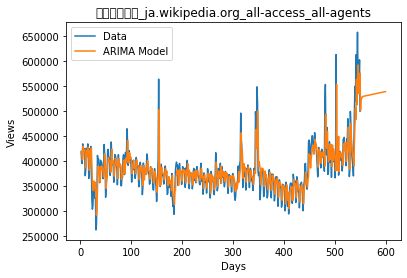

[ 5.51167667e+02  4.52674916e-01 -6.46817972e-01 -6.70198657e-01
  4.57033780e-01  3.56762344e-02 -4.95822985e-01]


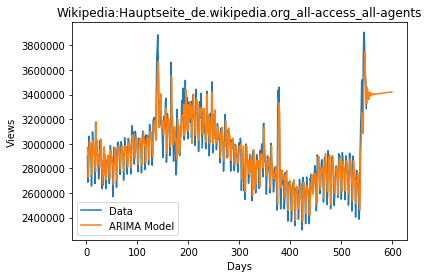

[-78.96185023   1.24591279  -0.99992601  -1.3200093    0.75303998
   0.34600662  -0.32921339]


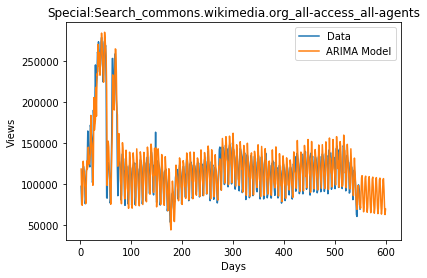

[-1.43910082e+02  1.24681417e+00 -9.99854443e-01 -1.45063914e+00
  1.16261330e+00 -9.09976585e-02 -8.54781916e-02]


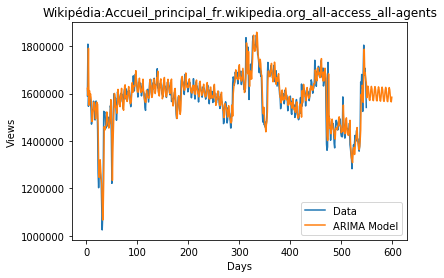

[78.99031832 -0.15832168  0.22184842 -0.10252083 -0.47267983]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39318 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 39029 missing from current font.
  font.set_text(s, 0, flags=flags)


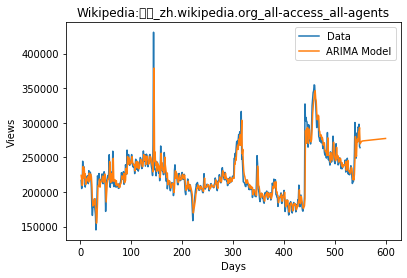

[-5.68313297e+02 -5.31477073e-01 -3.37139842e-01  7.87839865e-01
  4.22701089e-01]


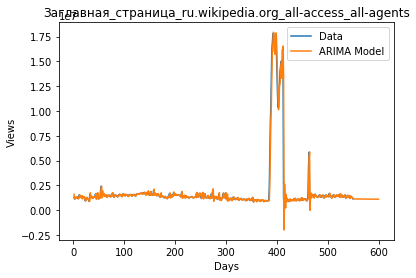

[-1.30957507e+03  1.24623292e+00 -9.99958789e-01 -1.82025306e+00
  1.42994863e+00 -2.19491657e-01 -2.87135036e-01]


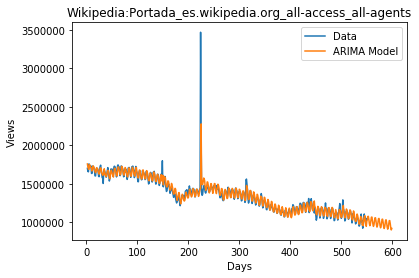

In [42]:
# Traffic forecating using ARIMA model.

cols = data.columns[1:-1]
for key in top_pages:
    data_ = np.array(data.loc[top_pages[key],cols])
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data_,[2,1,4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data_,[2,1,2])
                result = arima.fit(disp=False)
            except:
                print(data.loc[top_pages[key],'Page'])
                print('\tARIMA failed')
    #print(result.params)
    pred = result.predict(2,599,typ='levels')
    x = [i for i in range(600)]
    i=0

    plt.plot(x[2:len(data_)],data_[2:] ,label='Data')
    plt.plot(x[2:],pred,label='ARIMA Model')
    plt.title(data.loc[top_pages[key],'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()